## Principal Component Analysis (PCA)

* Hierarchical coordinate system based on the data(the new coordinate system captures the maximum amout of varience of the data in decending order)

$ X = \begin{bmatrix}
a^{(1)}_1 & a^{(1)}_2 & .. &a^{(1)}_m\\
a^{(2)}_1 & a^{(2)}_2 & .. &a^{(2)}_m\\
.. & ..  & .. & ..\\
a^{(n)}_1 & a^{(n)}_2 & .. &a^{(n)}_m\\
\end{bmatrix}$

* Each row of $X$ is representing measurement from single experiment 

* PCA procedure:
1. compute the mean of each columns(or computing the mean along the row axes)
    $\\ \bar{x} = 1/n \sum_{j=1}^n x_j\\$
    $\bar{X} = \begin{bmatrix}
                1 \\
                1 \\
                 .\\
                1 \\
                \end{bmatrix} 
                \begin{bmatrix}
                ..... \bar{x} ...
                \end{bmatrix} $

2. substract the mean 
$\\ B = X - \bar{X}$

3. Covarince matrix of B
$\\ C = B^T B$

4. Compute the eign values of $C$
$\\ CV = VD \Rightarrow V^T C V = D$ where, $V$ is eign vectors and $D$ is eign values 
* values of matrix $D$ are $\lambda_i = \sigma_i^2$, where $\sigma_i^2$ is the varinces
* Fractional varience captured by eign values of order r is given by: $ \frac{\sum_{k=1}^r \lambda_k}{\sum_{k=1}^n \lambda_k}$ 

* principle components are given by: $T = B V $, where $V$ are loadings 

* From SVD,  $B=U \Sigma V^T$, therefore the principle components, $T = U \Sigma$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Example 1: Let's Do PCA on a toy problem 

In [2]:
n_points = 1000
# create 2D gaussina point cloud 
X = np.random.randn(2,n_points) 

In [3]:
# doing all of the above steps in one step 
n_points = 1000             # no of data points 
center = np.array([2,1])    # center of data 
sigma  = np.array([2,0.5])  # single values 

theta = np.pi/3             # rotation angle 
R = np.array([[np.cos(theta),-np.sin(theta)], # ratation matrix 
              [np.sin(theta),np.cos(theta)]])


X = np.random.randn(2,n_points) # 2D gaussin cloud of data 
X = R @ np.diag(sigma) @ X + np.diag(center) @ np.ones((2,n_points))


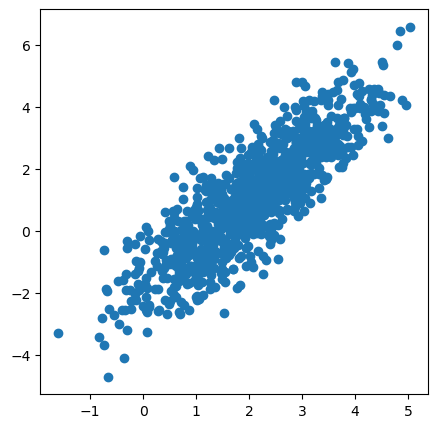

In [4]:
# plot the cloud (shifted, rotated and stretched)
plt.figure(figsize=(5,5))
plt.scatter(X[0,:],X[1,:])

In [5]:
# find the singluar values and axes of X (assuming we don't know them)

# do the mean substrcation and normalize 
X_mean = np.mean(X,axis=1).reshape(-1,1)
#X_std  = np.std(X,axis=1).reshape(-1,1)
B      = (X - X_mean)/np.sqrt(n_points)
# do the svd of the matrix B 
U, S, VT = np.linalg.svd(B, full_matrices=False)
print(f'singular values are = {S}')

singular values are = [2.01815618 0.51406903]


In [6]:
# generate the confindence intervals 
theta  = np.arange(0,2*np.pi,0.01)
X_std  = U @ np.diag(S) @ np.array([np.sin(theta),np.cos(theta)])    # std 

std1 =   X_std + np.diag(X_mean.flatten()) @ np.ones((2,len(theta))) # 1st std 
std2 = 2*X_std + np.diag(X_mean.flatten()) @ np.ones((2,len(theta))) # 2nd std
std3 = 3*X_std + np.diag(X_mean.flatten()) @ np.ones((2,len(theta))) # 3rd std

In [7]:
# principle components T = U@S 
 
pc_1 = U[:,0] @ np.diag(S) # first principle component 
pc_2 = U[:,1] @ np.diag(S) # second principle component 

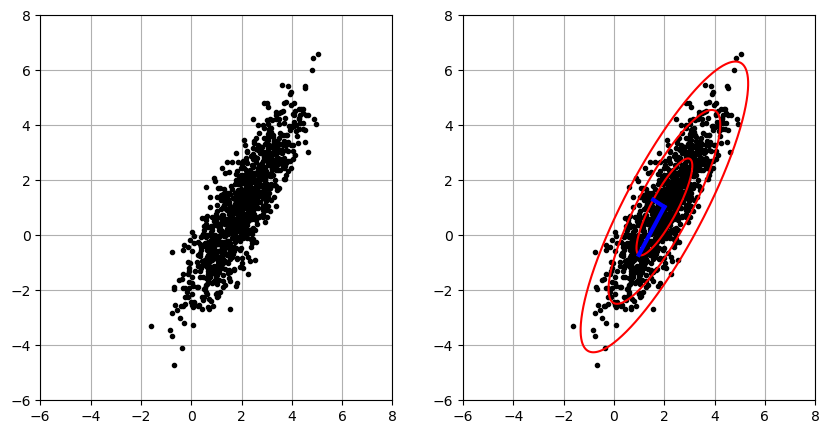

In [8]:
plt.rcParams['figure.figsize'] = [10, 5]
fig = plt.figure()
ax1 = fig.add_subplot(121)
# plot the gassian data cloud (in 2D)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))
# plot stds
ax2.plot(std1[0,:],std1[1,:],'r-')
ax2.plot(std2[0,:],std2[1,:],'r-')
ax2.plot(std3[0,:],std3[1,:],'r-')
# plot principle components 
Xavg = X_mean.flatten()
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='b',linewidth=3) # first PC 
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='b',linewidth=3) # second PC 




## Use PCA for dimentionality reduction 

In [9]:
# load data 
import os 
data = np.loadtxt(os.path.join('DATA','ovariancancer_obs.csv'),delimiter=',')
data.shape

(216, 4000)

In [10]:
# find the SVD 
U, S, VT = np.linalg.svd(data,full_matrices=False)

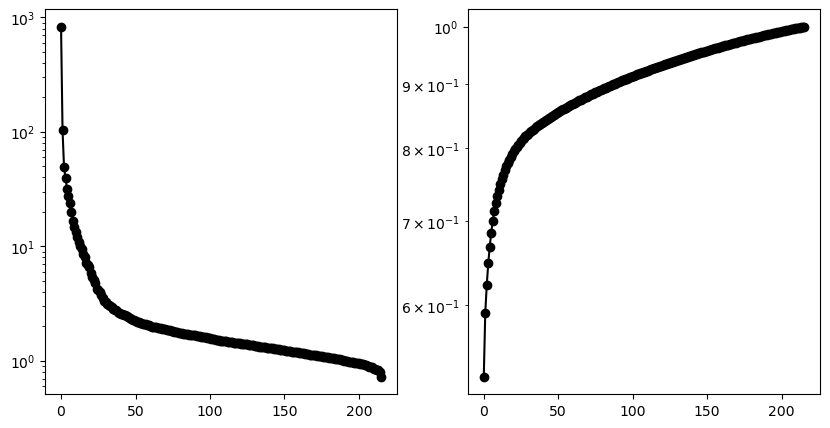

In [11]:
# plot the eigh energies 

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-ko')
ax2 = fig1.add_subplot(122)
ax2.semilogy(np.cumsum(S)/np.sum(S),'-ko')

FileNotFoundError: [Errno 2] No such file or directory: 'databook_python/DATA/ovariancancer_grp.csv'

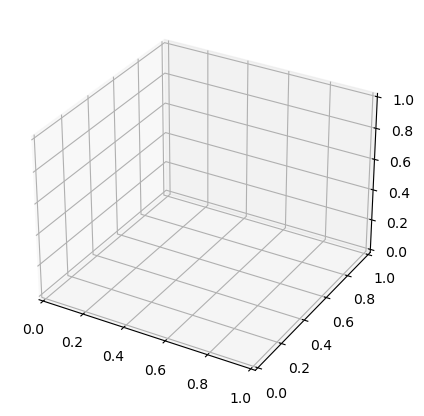

In [12]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
f = open(os.path.join('DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")
obs = data

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T # project data along first pca 
    y = VT[1,:] @ obs[j,:].T # project data along second pca 
    z = VT[2,:] @ obs[j,:].T # project data along third pca 
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()